# Skew
**Here, we are assuming the data is not normally distributed therefore 
fixing the skew is the next step after imputating our data**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('WorkingDataFrame', index_col=0)
df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C4,...,Y2,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,0.029074,...,1,1,3.864345,11.111111,0.640426,0.959734,0.057285,0.005147,0.009714,0.011540
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-0.013352,...,0,0,12.028832,0.000000,0.644753,1.625986,0.092985,0.005895,0.020091,0.019676
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,0.020715,...,0,0,3.369134,0.000000,0.636816,0.397260,0.026982,0.005064,0.002740,0.004981
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,0.020023,...,1,0,3.299697,0.000000,0.539634,0.628809,0.042258,0.006642,0.004898,0.009132
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,-0.034895,...,1,1,3.726269,5.000000,0.587413,1.093898,0.059776,0.005562,0.012370,0.013865


In [3]:
# Removing "Y" values from the DataFrame temporarily 
target = df.iloc[:,:7]
target2 = df.iloc[:,11:13]
targets = pd.concat([target, target2], axis=1, join_axes=[df.index])
df = df.drop(['I1','I2','I3','P_IPO','P_H','P_L','P_1DAY','Y1','Y2'], axis=1)
df.head(15)

,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,122.0,1.0,0.029074,51.345,1,3.864345,11.111111,0.640426,0.959734,0.057285,0.005147,0.009714,0.011540
1,259.0,0.0,-0.013352,25.936,0,12.028832,0.000000,0.644753,1.625986,0.092985,0.005895,0.020091,0.019676
2,90.0,1.0,0.020715,7.378,0,3.369134,0.000000,0.636816,0.397260,0.026982,0.005064,0.002740,0.004981
3,209.0,1.0,0.020023,8.526,0,3.299697,0.000000,0.539634,0.628809,0.042258,0.006642,0.004898,0.009132
4,80.0,1.0,-0.034895,632.298,1,3.726269,5.000000,0.587413,1.093898,0.059776,0.005562,0.012370,0.013865
5,94.0,1.0,-0.057556,197.591,1,5.724394,0.000000,0.643137,1.156829,0.067663,0.005147,0.007970,0.015027
6,128.0,1.0,0.004106,5.146,0,3.463095,0.000000,0.765657,1.158406,0.057949,0.006808,0.008800,0.011208
7,91.0,0.0,0.040620,103.833,0,2.421469,0.000000,0.826347,0.834869,0.051806,0.004566,0.009963,0.010129
8,100.0,1.0,-0.029316,279.600,0,4.816591,0.000000,0.540323,1.117725,0.076131,0.004815,0.010295,0.019427
9,106.0,1.0,-0.024925,494.008,1,3.056608,0.000000,0.514286,0.673059,0.038107,0.006725,0.007472,0.012204


In [4]:
# Checking new DataFrame containing only Target and Y values
targets.head(2)

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.87,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.25,1,0


In [5]:
# Exporting DataFrame as CSV 
targets.to_csv('Targets', ',')

In [8]:
# Checking Skew of DataFrame
df.skew() 
# Skipping C2 and C3' because they are binary 
# Skipping C4 amd T4' because already skewed properly
# Our goal is to get the skewnesss between [-0.5, 0.5]
# Otherwise, we want to get the skewness as close to that range as possible [-1, 1]

C1      0.146560
C2     -2.123926
C4     -0.491134
C7     12.348960
C3'    -0.117764
C5'    10.648354
C6'     4.396060
T4'     0.080198
T3'     1.617719
T5'    12.829137
S1'     2.330122
S2'     3.737864
S3'     3.440281
dtype: float64

Text(0.5, 1.0, 'Fixed Shew - C1')

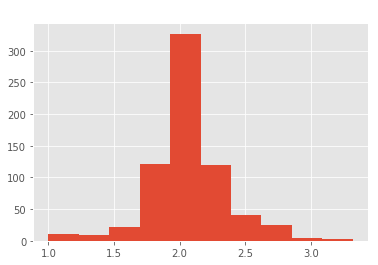

In [7]:
# Fixing Positive Skew of C1
df['C1'] = np.log10(df['C1'])
plt.hist(df['C1'])
plt.title("Fixed Shew - C1", color='white')

Text(0.5, 1.0, 'Fixed Shew - C7')

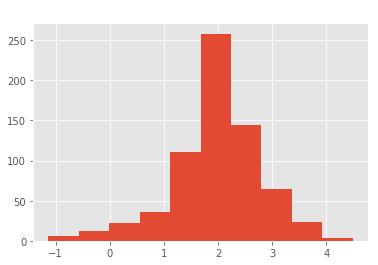

In [13]:
# Fixing Positive Skew of C7
df['C7'] = np.log10(df['C7'])
# Leaving as Moderatly Skewed 
plt.hist(df['C7'])
plt.title("Fixed Shew - C7", color='white')

Text(0.5, 1.0, "Fixed Shew - C5'")

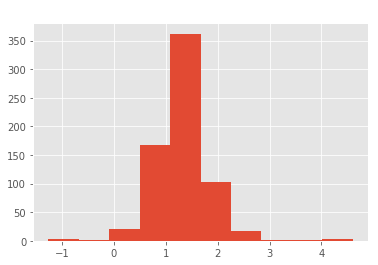

In [14]:
# Fixing Positive Skew of C5'
df["C5'"] = np.log(df["C5'"])
plt.hist(df["C5'"])
# Leaving moderately skewed to avoid runtime warnings
plt.title("Fixed Shew - C5'", color='white')

Text(0.5, 1.0, "Fixed Shew - C6'")

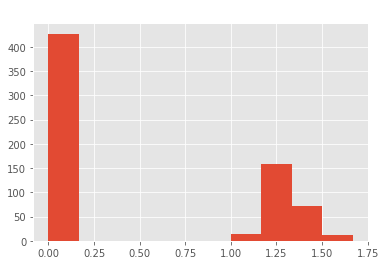

In [15]:
# Fixing Positive Skew of C6'
df["C6'"] = np.cbrt(np.cbrt(df["C6'"]))
plt.hist(df["C6'"])
plt.title("Fixed Shew - C6'", color='white')

Text(0.5, 1.0, "Fixed Shew - T3'")

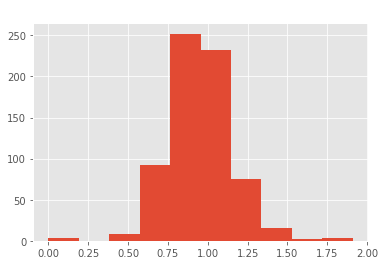

In [16]:
# Fixing Positive Skew of C6'
df["T3'"] = np.sqrt(df["T3'"])
plt.hist(df["T3'"])
plt.title("Fixed Shew - T3'", color='white')

Text(0.5, 1.0, "Fixed Shew - T5'")

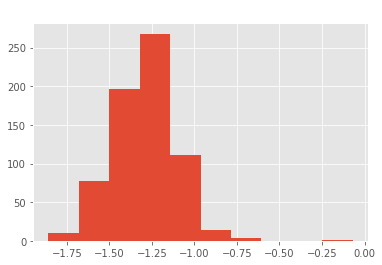

In [17]:
# Fixing Positive Skew of C6'
df["T5'"] = np.log10(df["T5'"])
plt.hist(df["T5'"])
plt.title("Fixed Shew - T5'", color='white')

Text(0.5, 1.0, "Fixed Shew - S1'")

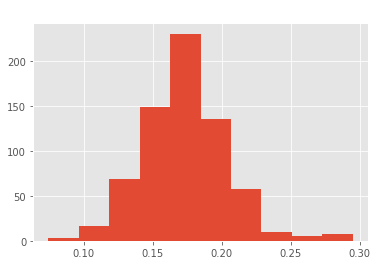

In [18]:
# Fixing Positive Skew of S1'
df["S1'"] = np.cbrt(df["S1'"])
plt.hist(df["S1'"])
plt.title("Fixed Shew - S1'", color='white')

Text(0.5, 1.0, "Fixed Shew - S2'")

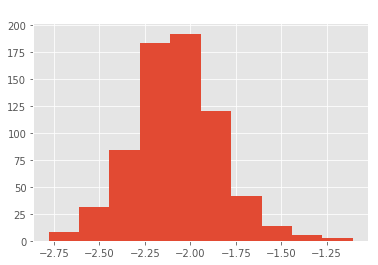

In [19]:
# Fixing Positive Skew of S2
df["S2'"] = np.log10(df["S2'"])
plt.hist(df["S2'"])
plt.title("Fixed Shew - S2'", color='white')

Text(0.5, 1.0, "Fixed Shew - S3'")

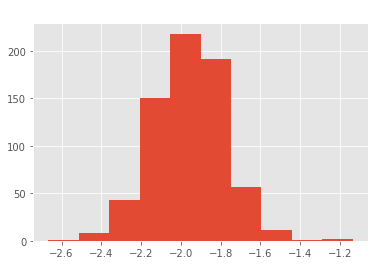

In [20]:
# Fixing Positive Skew of S3'
df["S3'"] = np.log10(df["S3'"])
plt.hist(df["S3'"])
plt.title("Fixed Shew - S3'", color='white')

In [22]:
# Checking updated skew of DataFrame
df.skew()

C1     0.146560
C2    -2.123926
C4    -0.491134
C7    -0.640897
C3'   -0.117764
C5'    0.825354
C6'    0.551889
T4'    0.080198
T3'    0.170438
T5'    0.424292
S1'    0.539980
S2'    0.257575
S3'    0.092696
dtype: float64

In [23]:
# Exporting DataFrame as CSV 
df.to_csv('SkewDF1', ',')